# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timezone

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

input_data_file = "Resources/cities.csv"

# Output File (CSV)
output_data_file = "Resources/weatherData.csv"

# Output File (HTML)
output_data_html_file = "Resources/weatherData.html"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
cities_data = pd.read_csv(input_data_file)
cities_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,jacareacanga,0,BR,1528902000,62,-6.22,-57.76,89.60,6.93
1,1,kaitangata,100,NZ,1528905304,94,-46.28,169.85,42.61,5.64
2,2,goulburn,20,AU,1528905078,91,-34.75,149.72,44.32,10.11
3,3,lata,76,IN,1528905305,89,30.78,78.62,59.89,0.94
4,4,chokurdakh,0,RU,1528905306,88,70.62,147.90,32.17,2.95


In [17]:
cities = []
cities = cities_data['City']
len(cities)

547

In [18]:
# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

temp=[]
cityList=[]
country=[]
lat=[]
lon=[]
cloudiness=[]
humidity=[]
date=[]
maxTemp=[]
wind=[]
timezone=[]
localTimestamp=[]

row_count = 0
set_count=1

#Retrieving current datafrom wethermap api
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    # Build query URL and request your results
    try:
        row_count+=1
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        print(f"Processing records {row_count} of set {set_count}| {city}")
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Extracting values for plotting
        if weather_json["cod"] != "404":
            cityList.append(city)
            temp.append(weather_json['main']['temp'])
            country.append(weather_json['sys']['country'])
            lat.append(weather_json['coord']['lat'])
            lon.append(weather_json['coord']['lon'])
            cloudiness.append(weather_json['clouds']['all'])
            wind.append(weather_json['wind']['speed'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            maxTemp.append(weather_json['main']['temp_max'])
            timezone.append(weather_json['timezone'])
            localDate = int(weather_json['dt']) + int(weather_json['timezone'])
            ts=datetime.fromtimestamp(localDate).strftime('%m-%d-%y')
            localTimestamp.append(ts)
            
    except  Exception as e:
        print(f"city({city}) not found!! skipping")
        print(e)
        pass
    if row_count % 50 == 0:
       set_count+=1
       row_count=0
print("--------------------------------")
print("Data Retrieval Complete ")
print("--------------------------------")

Beginning Data Retrieval
---------------------------
Processing records 1 of set 1| jacareacanga
Processing records 2 of set 1| kaitangata
Processing records 3 of set 1| goulburn
Processing records 4 of set 1| lata
Processing records 5 of set 1| chokurdakh
Processing records 6 of set 1| martyush
Processing records 7 of set 1| hobart
Processing records 8 of set 1| broken hill
Processing records 9 of set 1| harnosand
Processing records 10 of set 1| tuatapere
Processing records 11 of set 1| puerto ayora
Processing records 12 of set 1| havre-saint-pierre
Processing records 13 of set 1| punta arenas
Processing records 14 of set 1| tasiilaq
Processing records 15 of set 1| chapais
Processing records 16 of set 1| avarua
Processing records 17 of set 1| hofn
Processing records 18 of set 1| yukamenskoye
Processing records 19 of set 1| khandbari
Processing records 20 of set 1| bethel
Processing records 21 of set 1| ushuaia
Processing records 22 of set 1| east london
Processing records 23 of set 1|

Processing records 49 of set 4| port hawkesbury
Processing records 50 of set 4| naze
Processing records 1 of set 5| namibe
Processing records 2 of set 5| lodja
Processing records 3 of set 5| basco
Processing records 4 of set 5| suleja
Processing records 5 of set 5| tazovskiy
Processing records 6 of set 5| waterloo
Processing records 7 of set 5| kruisfontein
Processing records 8 of set 5| hithadhoo
Processing records 9 of set 5| aqtobe
Processing records 10 of set 5| trinidad
Processing records 11 of set 5| jasper
Processing records 12 of set 5| tempio pausania
Processing records 13 of set 5| kununurra
Processing records 14 of set 5| zhob
Processing records 15 of set 5| los llanos de aridane
Processing records 16 of set 5| nohar
Processing records 17 of set 5| sainte-suzanne
Processing records 18 of set 5| crotone
Processing records 19 of set 5| gambela
Processing records 20 of set 5| kavaratti
Processing records 21 of set 5| ust-ilimsk
Processing records 22 of set 5| leo
Processing rec

Processing records 50 of set 8| zagora
Processing records 1 of set 9| zhongxing
Processing records 2 of set 9| snezhnogorsk
Processing records 3 of set 9| sola
Processing records 4 of set 9| sioux lookout
Processing records 5 of set 9| sur
Processing records 6 of set 9| utete
Processing records 7 of set 9| saint-joseph
Processing records 8 of set 9| sadao
Processing records 9 of set 9| petropavlovsk-kamchatskiy
Processing records 10 of set 9| vestmanna
Processing records 11 of set 9| chifeng
Processing records 12 of set 9| grants pass
Processing records 13 of set 9| lampazos de naranjo
Processing records 14 of set 9| salym
Processing records 15 of set 9| verkh-chebula
Processing records 16 of set 9| tsiroanomandidy
Processing records 17 of set 9| lagoa
Processing records 18 of set 9| les cayes
Processing records 19 of set 9| mackay
Processing records 20 of set 9| treuchtlingen
Processing records 21 of set 9| witney
Processing records 22 of set 9| tabou
Processing records 23 of set 9| k

### Create Dictionary For All The Required Data
* Assign all list values 


In [20]:
# create a data frame for city weather data
weather_dict = {
    "City": cityList,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Temp": temp,
    "Lat":lat,
    "Lon":lon,
    "Max Temp":maxTemp,
    "Wind Speed":wind,
    "Date-Local": localTimestamp
}
weather_data = pd.DataFrame(weather_dict)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
WeatherDataCSV = weather_data.to_csv(output_data_file,index=False,header=True)

#Displaying data 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lon,Max Temp,Wind Speed,Date-Local
0,jacareacanga,95,BR,1564993843,58,67.80,-6.22,-57.76,67.80,2.77,08-04-19
1,kaitangata,97,NZ,1564993843,65,45.00,-46.28,169.85,45.00,11.01,08-05-19
2,goulburn,10,AU,1564993843,69,40.48,-34.75,149.72,42.01,10.25,08-05-19
3,lata,99,IN,1564993844,87,54.12,30.78,78.62,54.12,6.11,08-05-19
4,chokurdakh,87,RU,1564993844,40,56.28,70.62,147.90,56.28,9.69,08-05-19


In [22]:
WeatherDataHTML = weather_data.to_html(classes=None, border=0, justify='justify-all')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

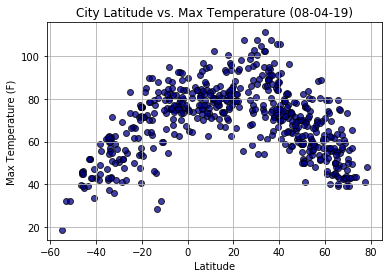

In [23]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Max Temp'].max()
yMin=weather_data['Max Temp'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Max Temp']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='darkblue', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Max Temperature ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")

#saving plot image to Image folder
fig.savefig('Images/LatvsMaxTemp.png')

#### Latitude vs. Humidity Plot

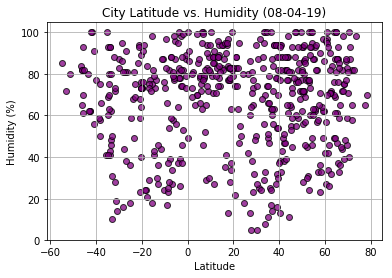

In [24]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Humidity'].max()
yMin=weather_data['Humidity'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Humidity']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='purple', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Humidity ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

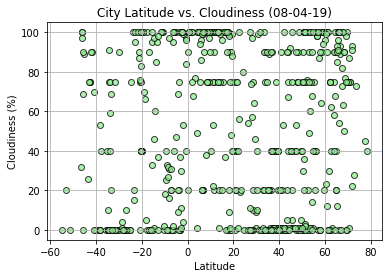

In [25]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Cloudiness'].max()
yMin=weather_data['Cloudiness'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Cloudiness']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='lightgreen', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Cloudiness ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

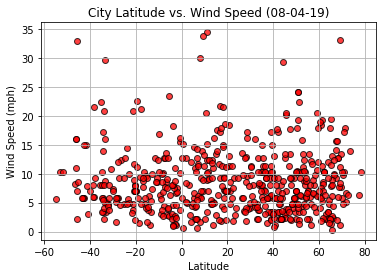

In [26]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Wind Speed'].max()
yMin=weather_data['Wind Speed'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Wind Speed']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='red', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Wind Speed ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsWindSpeed.png')
